In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.drop(["CustomerID"],axis=1,inplace=True)


In [4]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#  ****Violin and Box Plots of Annual Income and Score Range**** 

In [5]:
display(df.describe())

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


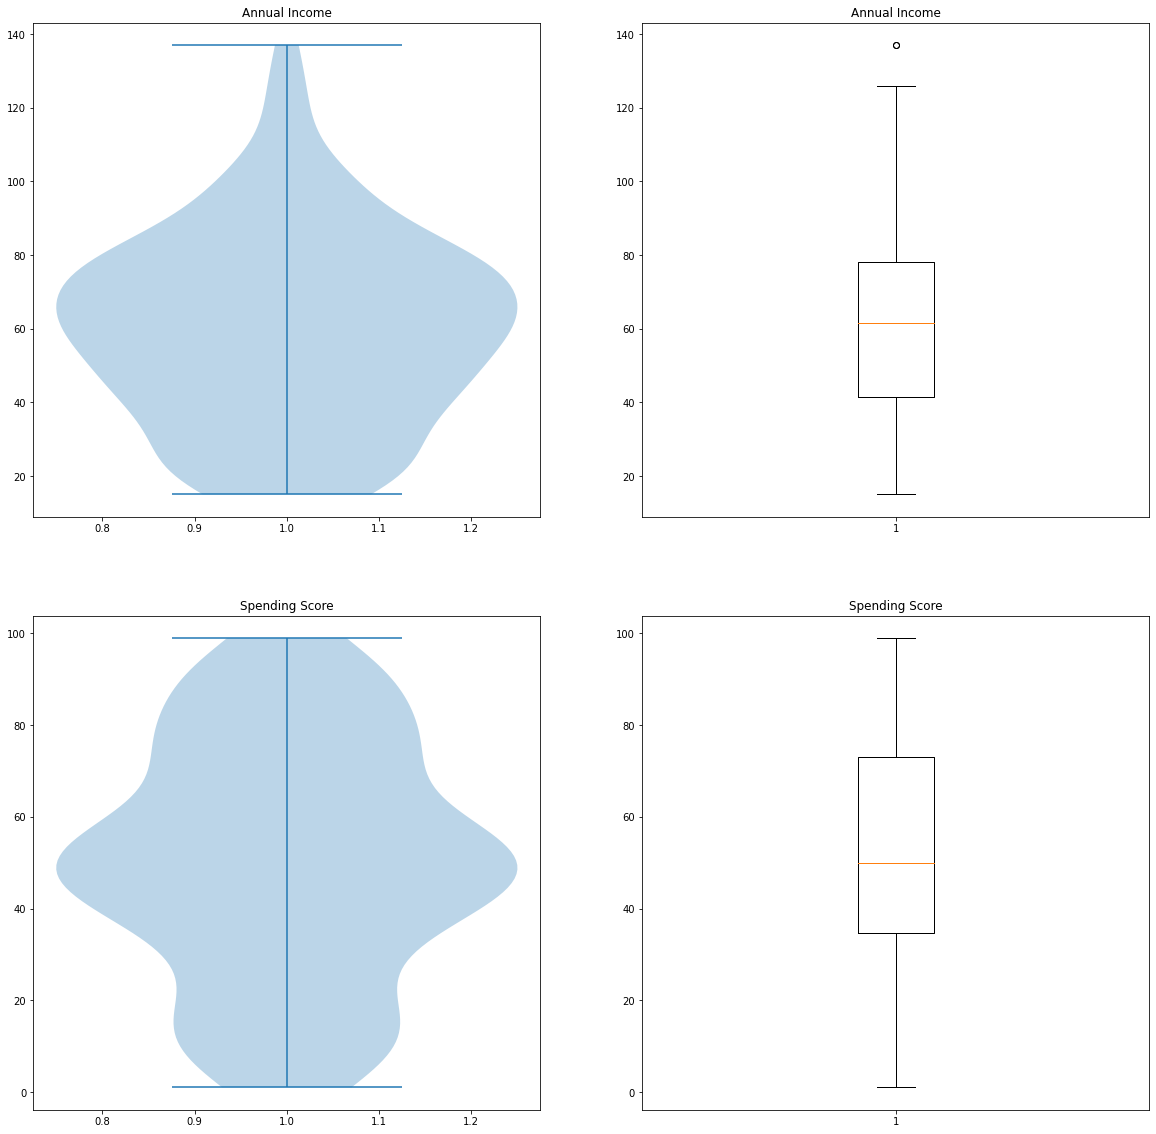

In [6]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title("Annual Income")
plt.violinplot(df["Annual Income (k$)"])

plt.subplot(2,2,2)
plt.title("Annual Income")
plt.boxplot(df["Annual Income (k$)"])

plt.subplot(2,2,3)
plt.title("Spending Score")
plt.violinplot(df["Spending Score (1-100)"])

plt.subplot(2,2,4)
plt.title("Spending Score")
plt.boxplot(df["Spending Score (1-100)"])

plt.show()

****Notice the difference between Violin and Box plots.<br>
Violin plots try to capture all the data and hence cannot be considered as a good estimate for finding outliers.<br>
In the following figures:<br>
Spending Score is evenly distributed and the Median is around 50 whereas,<br>
in case of Annual Income,its around 60.****

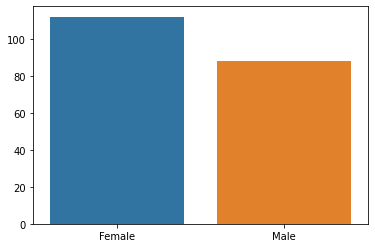

In [7]:
genders= df["Gender"].value_counts()
sns.barplot(x= genders.index,y=genders.values)
plt.show()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

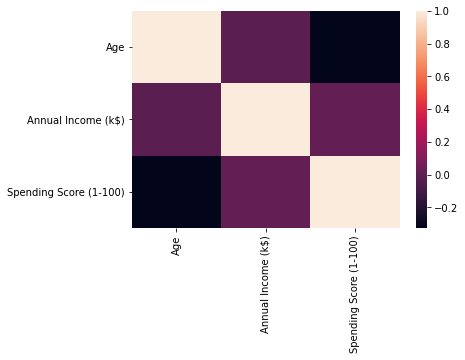

In [9]:
correlation= df.corr()
display(correlation)
sns.heatmap(correlation)

Nothing Useful.... :(

**Annual Income is stated as :<br>
Min=15,<br>
Max=137,<br>
25%Q= 41.5,<br>
50%Q= 61.5,<br>
75%Q= 75**<br>

**From this information, we could have 5 columns starting from <br>
(15-39),(40-64),(65-90),(90-115),(115-140)**<br>

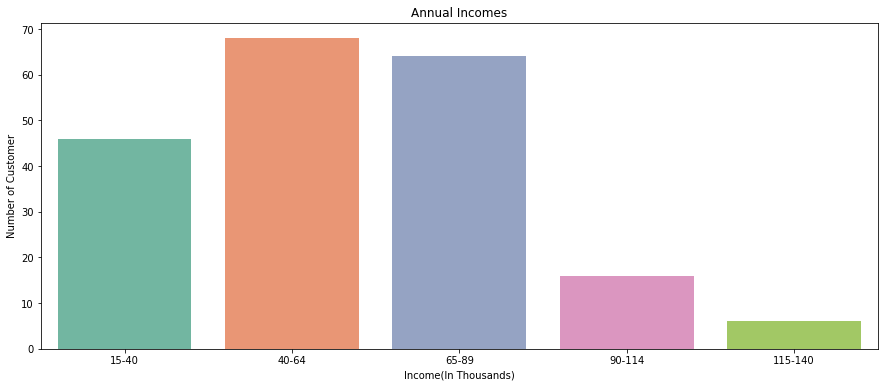

In [15]:
 a = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 15) & (df["Annual Income (k$)"] <= 39)]
 b = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 40) & (df["Annual Income (k$)"] <= 64)]
 c = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 65) & (df["Annual Income (k$)"] <= 89)]
 d = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 90) & (df["Annual Income (k$)"] <= 114)]
 e = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 115) & (df["Annual Income (k$)"] <= 140)]

 aix = ['15-40','40-64','65-89','90-114','115-140']
 aiy = [len(a.values), len(b.values), len(c.values), len(d.values), len(e.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income(In Thousands)")
plt.ylabel("Number of Customer")
plt.show()

# Elbow Method

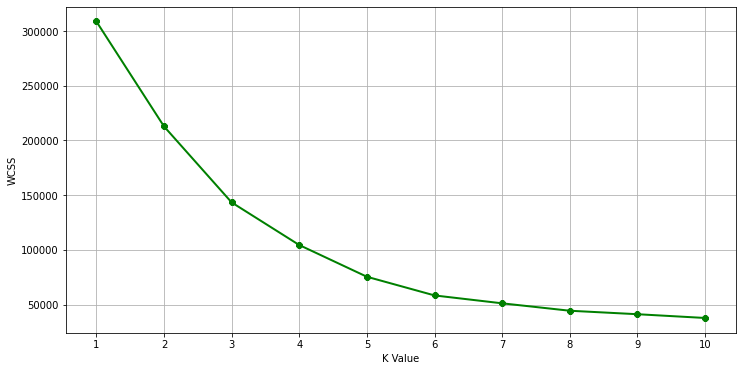

In [19]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="green", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

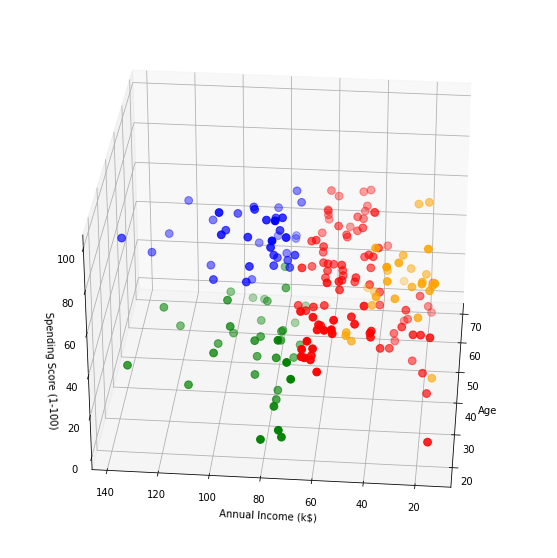

In [22]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()